In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
#Performing EDA (Exploratory Data Analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
 # Conerting yes or no data into 1 or 2
df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']] =df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']].eq('Yes').astype(int)

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [ ]:
df1 =df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]

In [ ]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
df1.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [ ]:
# Appling scaling on the dataframe df1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df1)

In [ ]:
df1

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.339489  ,
         2.00690848, -0.56648839],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.74655335,
         2.00690848, -0.56648839],
       [-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882,  1.76526126]])

In [ ]:
#Now appling PCA technique principle component analysis
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca= pd.DataFrame(pca.fit_transform(df1),
               columns = ['PC 1', 'PC 2'])
x_pca

,PC 1,PC 2
0,0.704334,-0.437016
1,-0.467820,0.364277
2,0.191986,1.712949
3,-0.116991,-1.155122
4,-0.034724,-1.390267
...,...,...
1448,3.499105,1.069999
1449,-1.568786,0.899328
1450,-0.414275,1.810438
1451,-2.803630,0.562759


In [ ]:
PC1 = pca.fit_transform(df1)[:,0]
PC2 = pca.fit_transform(df1)[:,1]
ldngs = pca.components_

In [ ]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']

<Figure size 640x480 with 0 Axes>

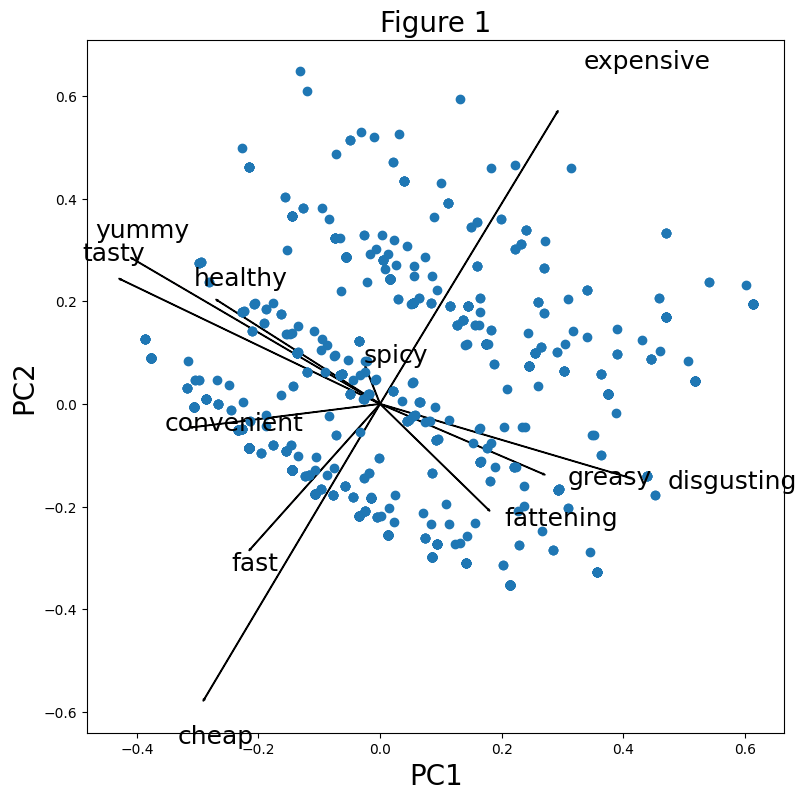

<Figure size 640x480 with 0 Axes>

In [ ]:
# Principle component analysis biplot
fig, ax = plt.subplots(figsize=(9, 9))

for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i],
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15,
            ldngs[1, i] * 1.15,
            feature, fontsize=18)

ax.scatter(PC1 * scalePC1,PC2 * scalePC2)

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plt.figure()

In [ ]:
#Appling Kmeaans algorithm
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

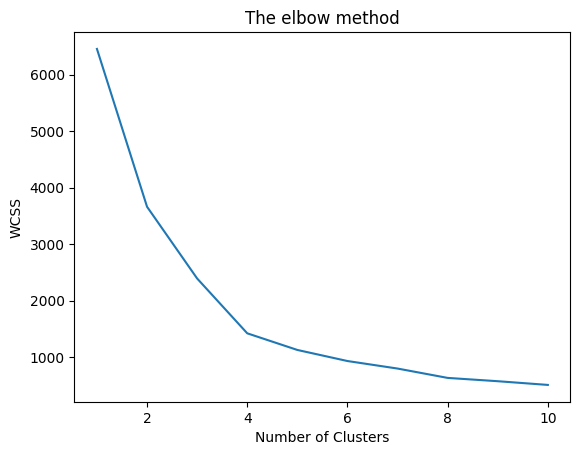

In [ ]:
# Step- Extracting Segment
#Appling elbow method for finding aprrox. no of clusters to form
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Appling Kmeans on 4 cluster
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit_predict(x_pca)
df['cluster_num']=kmeansmodel.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


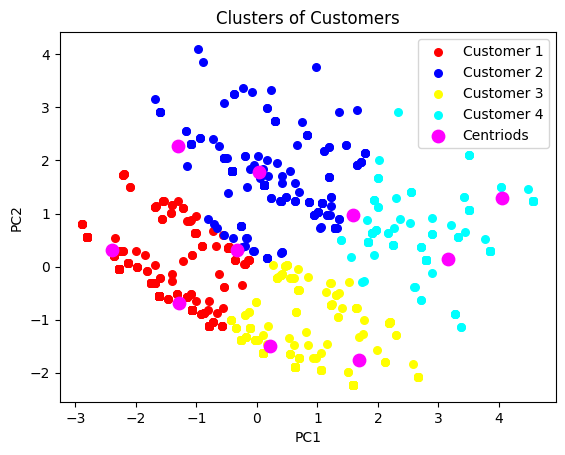

In [ ]:
#Cluster plot on segment members
plt.scatter(x_pca.iloc[y_kmeans==0,0],x_pca.iloc[y_kmeans==0,1],s=30,c='red',label='Customer 1')
plt.scatter(x_pca.iloc[y_kmeans==1,0],x_pca.iloc[y_kmeans==1,1],s=30,c='blue',label='Customer 2')
plt.scatter(x_pca.iloc[y_kmeans==2,0],x_pca.iloc[y_kmeans==2,1],s=30,c='yellow',label='Customer 3')
plt.scatter(x_pca.iloc[y_kmeans==3,0],x_pca.iloc[y_kmeans==3,1],s=30,c='cyan',label='Customer 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c='magenta',label='Centriods')
plt.title('Clusters of Customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [ ]:
#Step- Describing segment
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,3,6,2,5,13,43,66,94,143,111,102
1,5,5,12,12,9,39,44,54,69,43,35
2,63,37,40,28,27,60,35,35,12,6,5
3,81,23,19,14,9,27,7,4,5,0,1


<Figure size 640x480 with 0 Axes>

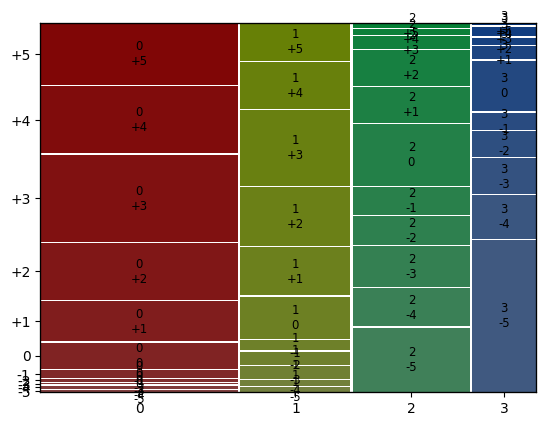

In [ ]:
fig = plt.figure()
mosaic(crosstab.stack())
plt.show()

In [ ]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,355,233
1,150,177
2,199,149
3,84,106


<Figure size 640x480 with 0 Axes>

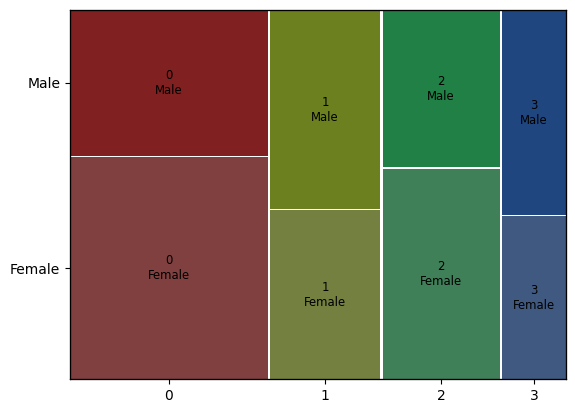

In [ ]:
fig = plt.figure()
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

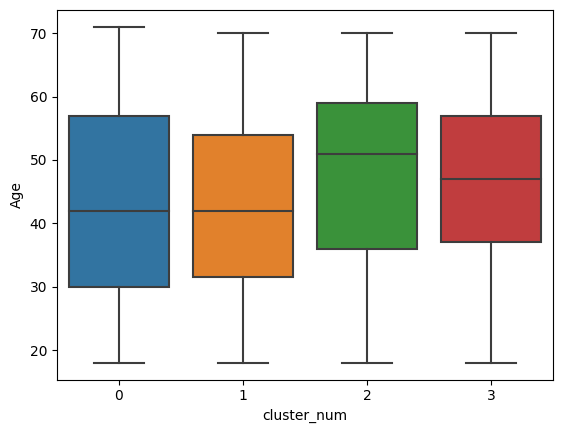

In [ ]:
sns.boxplot(x="cluster_num", y="Age",data=df)

In [ ]:
#Step- Selecting Target segment
#Calculating the mean
#Visit frequency
from sklearn import preprocessing
  # label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.593537
1,1,2.532110
2,2,2.772989
3,3,2.710526


In [ ]:
df['Like'] = label_encoder.fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,2.950680
1,1,3.477064
2,2,6.158046
3,3,7.700000


In [ ]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.396259
1,1,0.541284
2,2,0.428161
3,3,0.557895


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.396259,2.950680,2.593537
1,1,0.541284,3.477064,2.532110
2,2,0.428161,6.158046,2.772989
3,3,0.557895,7.700000,2.710526


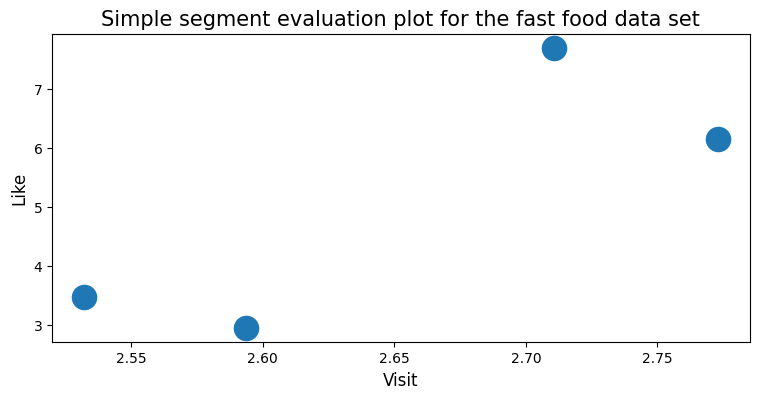

In [ ]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400)
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()